# This script uses a Neural Network to predict number of tornado fatalities given EF rating, number of Injuries, Length (miles), and Width (yds)

In [1]:
!pip3 install ann_visualizer
!pip install graphviz

### 1. Import & Inspect the Data

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy

In [3]:
# Connect to Google Drive
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# Loading data
tornado_df = pd.read_csv("gdrive/My Drive/Colab Notebooks/Final_Project/2008-2020_tornadoes_EF_cleaned.csv")
tornado_df

,Year,Month,Day,Timestamp,State,State_Fips,County_Fips,Start_Lat,Start_Lon,End_Lat,End_Lon,EF,Injuries,Fatalities,Loss,Crop_Loss,Length,Width
0,2008,10,11,2008-10-11 18:33:00,NM,35,49,35.1500,-105.9400,0.0000,0.0000,0,0,0,12000.0,NaN,0.02,10
1,2008,10,11,2008-10-11 21:54:00,KS,20,181,39.3300,-101.5500,0.0000,0.0000,0,0,0,NaN,NaN,0.25,10
2,2008,10,24,2008-10-24 16:55:00,GA,13,39,31.0200,-81.8100,0.0000,0.0000,0,0,0,1000.0,NaN,0.25,25
3,2008,10,6,2008-10-06 13:46:00,AR,5,113,34.5800,-94.1500,34.6300,-94.1200,1,0,0,75000.0,NaN,3.41,250
4,2008,10,6,2008-10-06 16:05:00,TX,48,67,33.0700,-94.1000,33.0900,-94.0800,0,0,0,75000.0,NaN,1.50,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15886,2020,9,1,2020-09-01 16:24:00,TN,47,95,36.3290,-89.4981,36.3517,-89.4729,0,0,0,NaN,2000.0,2.10,50
15887,2020,9,3,2020-09-03 15:57:00,MD,24,3,38.9480,-76.5695,38.9233,-76.4615,0,0,0,1250000.0,NaN,6.05,100
15888,2020,9,5,2020-09-05 16:17:00,CA,6,39,37.3500,-119.3400,37.5218,-119.3056,2,0,0,NaN,NaN,12.02,50
15889,2020,9,5,2020-09-05 18:29:00,CA,6,19,37.2500,-119.2000,37.2598,-119.1838,1,0,0,NaN,NaN,1.12,25


In [5]:
tornado_df.columns

Index(['Year', 'Month', 'Day', 'Timestamp', 'State', 'State_Fips',
       'County_Fips', 'Start_Lat', 'Start_Lon', 'End_Lat', 'End_Lon', 'EF',
       'Injuries', 'Fatalities', 'Loss', 'Crop_Loss', 'Length', 'Width'],
      dtype='object')

In [6]:
# drop na columns
tornado_df = tornado_df.dropna()

### 1. Define input data (X) and output data (y)

In [7]:
X = tornado_df.copy()
X = X.drop(['Year', 'Month', 'Day', 'Timestamp','State','Start_Lat','Start_Lon','End_Lat', 'End_Lon', 'Fatalities','State_Fips','County_Fips', 'Loss',	'Crop_Loss'], axis=1)
X

,EF,Injuries,Length,Width
22,1,0,8.13,200
28,2,2,4.09,150
29,3,4,8.19,100
73,1,0,10.59,500
81,1,0,3.14,250
...,...,...,...,...
15764,0,0,1.26,50
15785,1,1,0.26,50
15786,1,0,2.17,100
15838,0,0,2.58,100


In [8]:
y = tornado_df["Fatalities"].ravel()
y[:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

### 2. Splitting into Train and Test sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =78)

### 3. Scale the input data (X)

In [10]:
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### 4. Define Deep Learning Model

In [11]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X.columns)
hidden_nodes_layer1 = 12
hidden_nodes_layer2 = 6

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add( tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu") )

# Second hidden layer
nn.add( tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu") )

# Output layer
nn.add( tf.keras.layers.Dense(units=1, activation="sigmoid") )

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


### 5. Compile & Train the Model

In [12]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [13]:
# Compile the model
nn.compile(loss="mean_absolute_error", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period = 5)

In [14]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.33, epochs=200,callbacks=[cp_callback])

Epoch 1/200
11/11 [==============================] - 1s 42ms/step - loss: 0.8381 - accuracy: 0.6106 - val_loss: 0.5737 - val_accuracy: 0.6792
Epoch 2/200
11/11 [==============================] - 0s 10ms/step - loss: 0.8276 - accuracy: 0.6386 - val_loss: 0.5637 - val_accuracy: 0.6918
Epoch 3/200
11/11 [==============================] - 0s 7ms/step - loss: 0.8173 - accuracy: 0.6480 - val_loss: 0.5536 - val_accuracy: 0.6918
Epoch 4/200
11/11 [==============================] - 0s 8ms/step - loss: 0.8072 - accuracy: 0.6573 - val_loss: 0.5438 - val_accuracy: 0.7107
Epoch 5/200
 1/11 [=>............................] - ETA: 0s - loss: 1.0874 - accuracy: 0.7500
Epoch 5: saving model to checkpoints/weights.05.hdf5
11/11 [==============================] - 0s 10ms/step - loss: 0.7972 - accuracy: 0.6729 - val_loss: 0.5340 - val_accuracy: 0.7296
Epoch 6/200
11/11 [==============================] - 0s 8ms/step - loss: 0.7872 - accuracy: 0.6822 - val_loss: 0.5239 - val_accuracy: 0.7484
Epoch 7/200
11/

### 6. Save the Model

In [15]:
nn.save("NN_predictFatalities.h5")

### 7. Plot Model Performance

In [16]:
print(fit_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


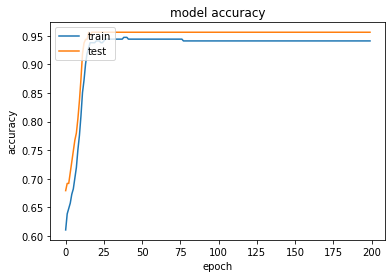

In [17]:
# summarize history for accuracy
plt.plot(fit_model.history['accuracy'])
plt.plot(fit_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


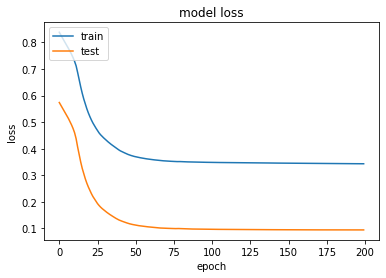

In [18]:
# summarize history for loss
plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
# Visualize the Neural Network
from ann_visualizer.visualize import ann_viz
ann_viz(nn,view=True, filename="NN_predictFatalities", title= "Fatalities Neural Network")

### 6. Model Accuracy

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

5/5 - 0s - loss: 0.0878 - accuracy: 0.9625 - 173ms/epoch - 35ms/step
Loss: 0.08784273266792297, Accuracy: 0.9624999761581421
